In [1]:
!pip install folium
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
matplotlib.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import folium
from IPython.display import HTML



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#전기차 등록현황 파일 불러오기
ecar_filepath = "서울특별시_전기차_현황.csv"
ecar_data = pd.read_csv(ecar_filepath, encoding='euc-kr')
ecar_data.head()


,연월별,시군구별,연료별,용도별,승 용,승 합,화 물,특 수,계
0,2017-12-31,종로구,전기,비사업용,73,0,2,0,75
1,2017-12-31,중 구,전기,비사업용,106,1,2,0,109
2,2017-12-31,중 구,전기,사업용,1,0,0,0,1
3,2017-12-31,용산구,전기,비사업용,67,0,0,0,67
4,2017-12-31,성동구,전기,비사업용,85,0,1,0,86


In [3]:
#전기차 충전소 현황 파일 불러오기
char_filepath = "전기충전소.csv"
char_data = pd.read_csv(char_filepath, encoding='cp949')
char_data.head()

,시도,군구,주소,충전소명,시설구분(대),시설구분(소),기종(대),기종(소),운영기관(대),운영기관(소),급속충전량,충전기타입,이용자제한,충전기ID
0,서울특별시,강남구,서울특별시 강남구 봉은사로 130,노보텔,상업시설,숙박시설,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1
1,서울특별시,강동구,서울특별시 강동구 고덕로28길 36,암사1동 공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1
2,서울특별시,강동구,서울특별시 강동구 선사로 70,천호유수지 공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1
3,서울특별시,강동구,서울특별시 강동구 진황도로29길 34,천호3동 제1공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1
4,서울특별시,강서구,서울특별시 강서구 가로공원로 189,가로공원로 지하공영주차장,주차시설,공영주차장,급속,급속(50kW),환경부,환경부(협회),급속(50kW),DC차데모+AC3상+DC콤보,이용가능,1


In [4]:
char_filepath = "전기충전소.csv"
char_data = pd.read_csv(char_filepath, encoding='cp949')
char_data.columns
char_data_columns = ['시도', '군구', '주소', '기종(대)', '이용자제한']
char_data_able = char_data[char_data_columns]

char_data_able.head()

,시도,군구,주소,기종(대),이용자제한
0,서울특별시,강남구,서울특별시 강남구 봉은사로 130,급속,이용가능
1,서울특별시,강동구,서울특별시 강동구 고덕로28길 36,급속,이용가능
2,서울특별시,강동구,서울특별시 강동구 선사로 70,급속,이용가능
3,서울특별시,강동구,서울특별시 강동구 진황도로29길 34,급속,이용가능
4,서울특별시,강서구,서울특별시 강서구 가로공원로 189,급속,이용가능


In [5]:
fast_char_data = char_data_able[(char_data_able["시도"] == "서울특별시") & (char_data_able["이용자제한"] == "이용가능") & (char_data_able["기종(대)"] == "급속")]

fast_char_data.head()

slow_char_data = char_data_able[(char_data_able["시도"] == "서울특별시") & (char_data_able["이용자제한"] == "이용가능") & (char_data_able["기종(대)"] == "완속")]

slow_char_data.head()

,시도,군구,주소,기종(대),이용자제한
7558,서울특별시,서초구,서울특별시 서초구 잠원로 88,완속,이용가능
7559,서울특별시,서초구,서울특별시 서초구 잠원로 88,완속,이용가능
7643,서울특별시,중구,서울특별시 중구 남대문시장10길 2,완속,이용가능
7644,서울특별시,중구,서울특별시 중구 남대문시장10길 2,완속,이용가능
7645,서울특별시,중구,서울특별시 중구 장충단로 275,완속,이용가능


In [6]:
fast_char_data.index = range(len(fast_char_data))
print('서울 전기차 급속 충전소 수 : ', len(fast_char_data))

slow_char_data.index = range(len(slow_char_data))
print('서울 전기차 완속 충전소 수 : ', len(slow_char_data))

서울 전기차 급속 충전소 수 :  1674
서울 전기차 완속 충전소 수 :  13446


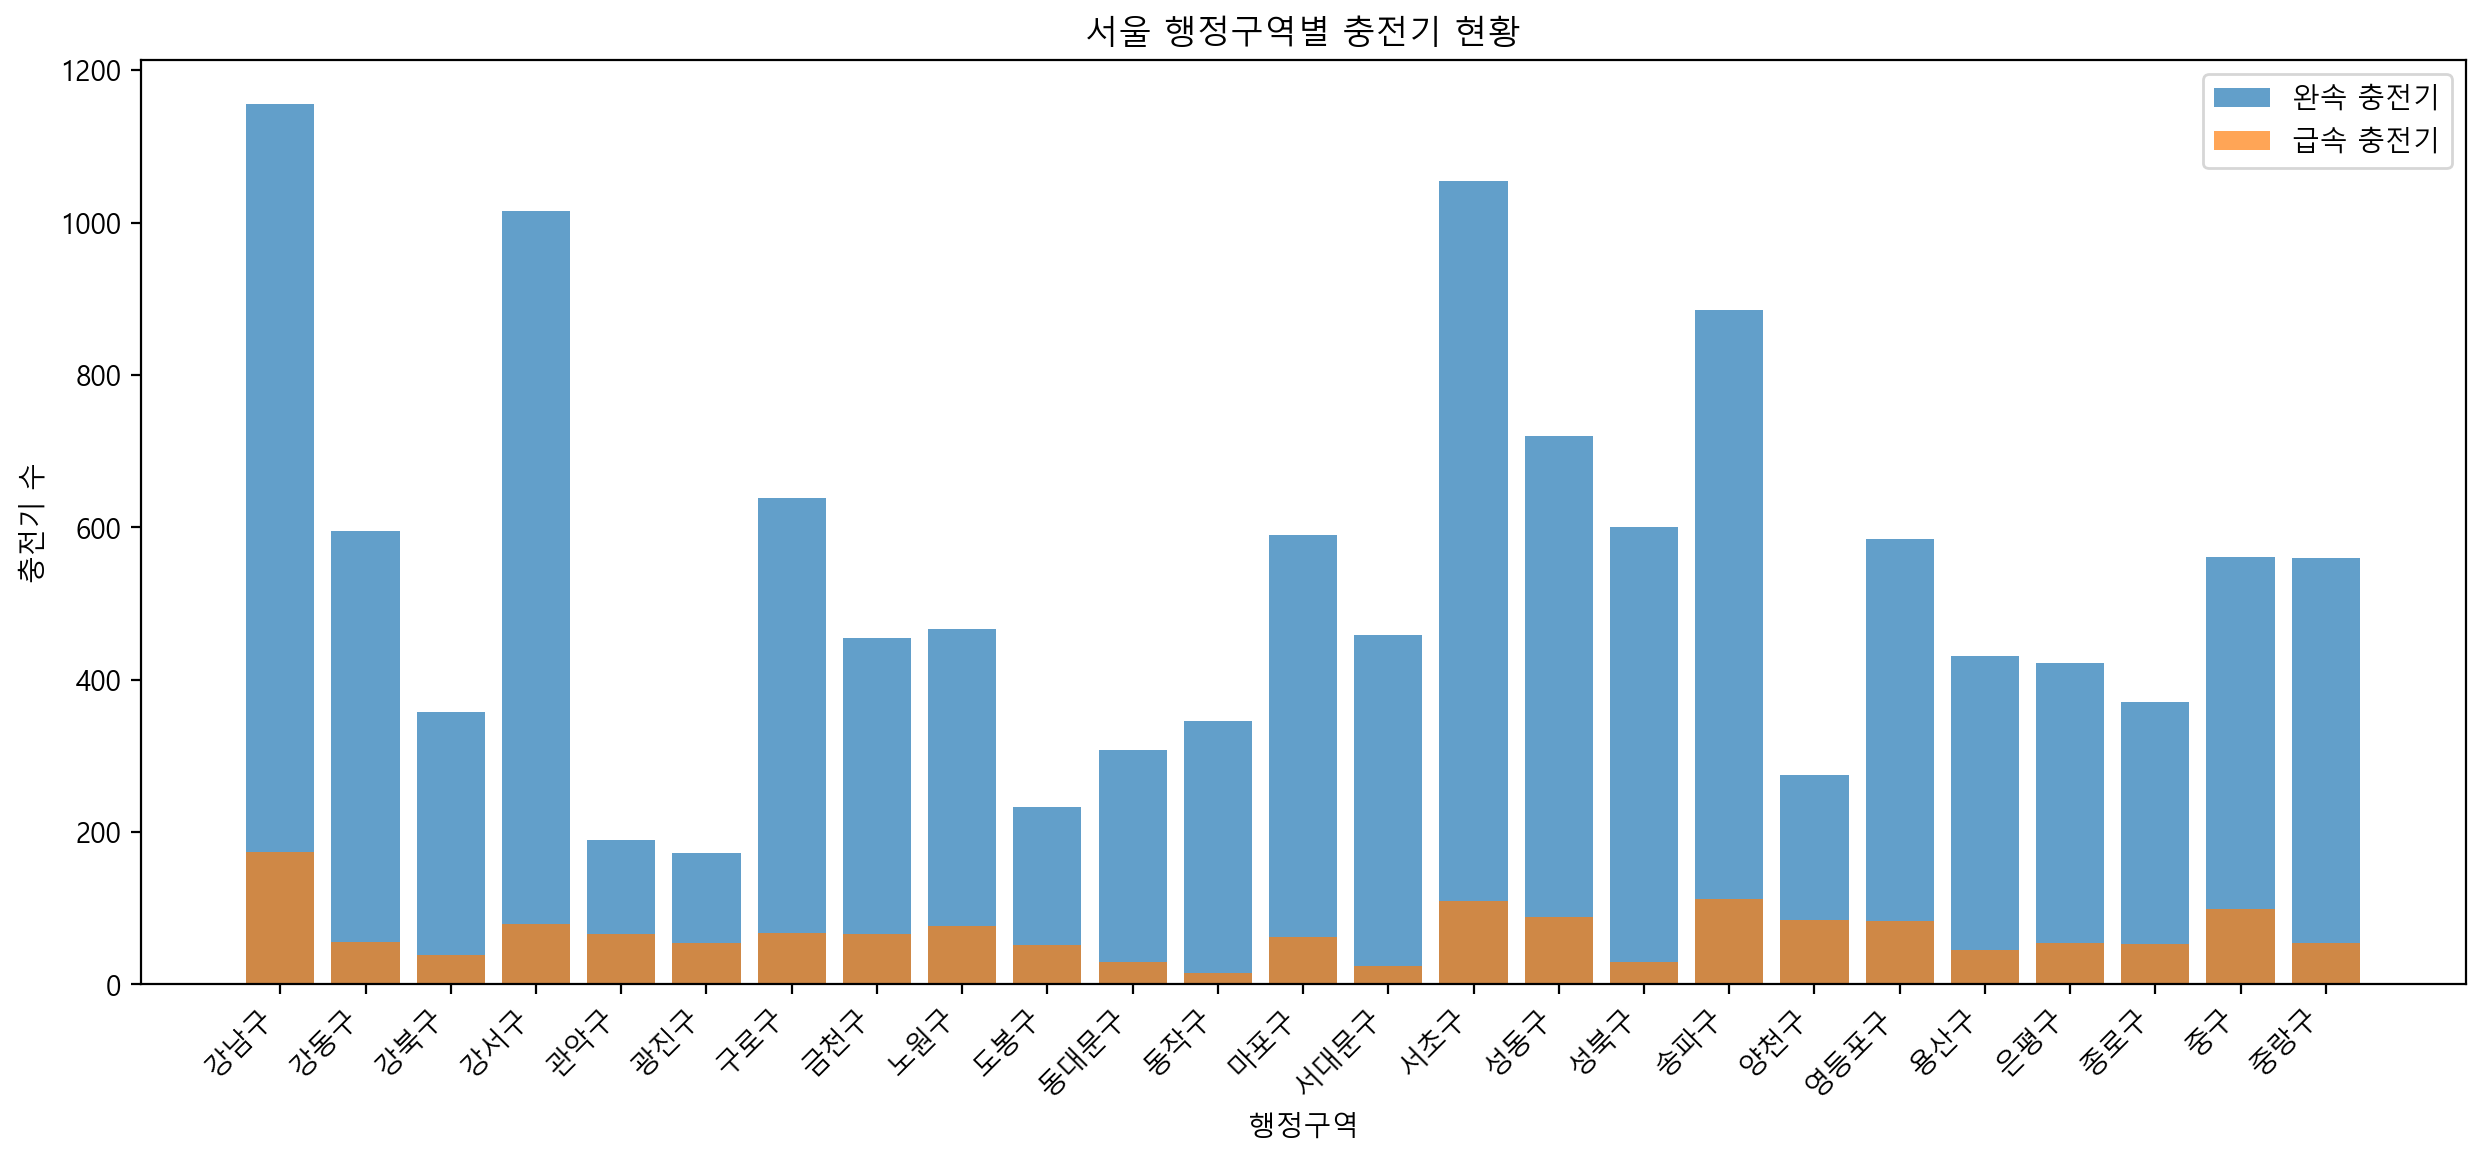

In [23]:
slow_counts = slow_char_data.groupby("군구").size()

# 행정구역별 급속 충전기 개수
fast_counts = fast_char_data.groupby("군구").size()

# 행정구역 순서대로 정렬
slow_counts = slow_counts.sort_index()
fast_counts = fast_counts.sort_index()

# 그래프 그리기
plt.figure(figsize=(15, 6))
plt.bar(slow_counts.index, slow_counts.values, label="완속 충전기", alpha=0.7)
plt.bar(fast_counts.index, fast_counts.values, label="급속 충전기", alpha=0.7)

plt.title("서울 행정구역별 충전기 현황")
plt.xlabel("행정구역")
plt.ylabel("충전기 수")
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.show()

In [7]:
#전기차 현황 불필요한 컬럼 제거
ecar_data.columns
ecar_data_columns = ['연월별','시군구별', '계']

ecar_data = ecar_data[ecar_data_columns]
ecar_data.head()

,연월별,시군구별,계
0,2017-12-31,종로구,75
1,2017-12-31,중 구,109
2,2017-12-31,중 구,1
3,2017-12-31,용산구,67
4,2017-12-31,성동구,86


In [8]:
#전기 충전소 현황 불필요한 컬럼 제거
char_data.columns
char_data_columns = ['시도', '군구', '주소', '충전소명']
char_data = char_data[char_data_columns]

char_data.head()


,시도,군구,주소,충전소명
0,서울특별시,강남구,서울특별시 강남구 봉은사로 130,노보텔
1,서울특별시,강동구,서울특별시 강동구 고덕로28길 36,암사1동 공영주차장
2,서울특별시,강동구,서울특별시 강동구 선사로 70,천호유수지 공영주차장
3,서울특별시,강동구,서울특별시 강동구 진황도로29길 34,천호3동 제1공영주차장
4,서울특별시,강서구,서울특별시 강서구 가로공원로 189,가로공원로 지하공영주차장


In [9]:
#전기 자동차 현황 중 최근 자료만 분류
seoul_ecar_data = ecar_data[ecar_data["연월별"] == "2022-07-31"]

seoul_ecar_data.head()

,연월별,시군구별,계
242,2022-07-31,종로구,615
243,2022-07-31,종로구,77
244,2022-07-31,중구,710
245,2022-07-31,중구,349
246,2022-07-31,용산구,848


In [10]:
#전기자동차 구별 groupby로 지역별 합산
seoul_ecar_data_result = seoul_ecar_data.groupby('시군구별')['계'].sum().reset_index()

print(seoul_ecar_data_result)

    시군구별      계
0    강남구  13703
1    강동구   1720
2    강북구    724
3    강서구   2317
4    관악구   1052
5    광진구    811
6    구로구   4210
7    금천구    779
8    노원구   1211
9    도봉구    819
10  동대문구    820
11   동작구    932
12   마포구   1390
13  서대문구    861
14   서초구   3880
15   성동구   1675
16   성북구   1154
17   송파구   2540
18   양천구   1376
19  영등포구   2679
20   용산구    910
21   은평구   1199
22   종로구    692
23    중구   1059
24   중랑구   1077


In [11]:
#전기차 충전소 총합 출력
seoul_char_data = char_data[char_data["시도"] == "서울특별시"]
seoul_char_data.index = range(len(seoul_char_data))
print('서울 전기차 충전소 수 : ', len(seoul_char_data))

seoul_char_data.head()

서울 전기차 충전소 수 :  33953


,시도,군구,주소,충전소명
0,서울특별시,강남구,서울특별시 강남구 봉은사로 130,노보텔
1,서울특별시,강동구,서울특별시 강동구 고덕로28길 36,암사1동 공영주차장
2,서울특별시,강동구,서울특별시 강동구 선사로 70,천호유수지 공영주차장
3,서울특별시,강동구,서울특별시 강동구 진황도로29길 34,천호3동 제1공영주차장
4,서울특별시,강서구,서울특별시 강서구 가로공원로 189,가로공원로 지하공영주차장


In [12]:
#지역 별로 충전소 개수 출력

seoul_char_data['군구'].value_counts().sort_index()


군구
강남구     2641
강동구     1352
강북구      633
강서구     1976
관악구      698
광진구      638
구로구     1634
금천구     1098
노원구     1520
도봉구      801
동대문구     992
동작구     1205
마포구     1570
서대문구     905
서초구     2303
성동구     2013
성북구     1794
송파구     2345
양천구     1023
영등포구    1424
용산구      876
은평구     1328
종로구      775
중구       984
중랑구     1425
Name: count, dtype: int64

In [13]:
#나눔 고딕 폰트 설정
from matplotlib import rc
import matplotlib.pyplot as plt

# 폰트 설정
rc('font', family='Malgun Gothic')

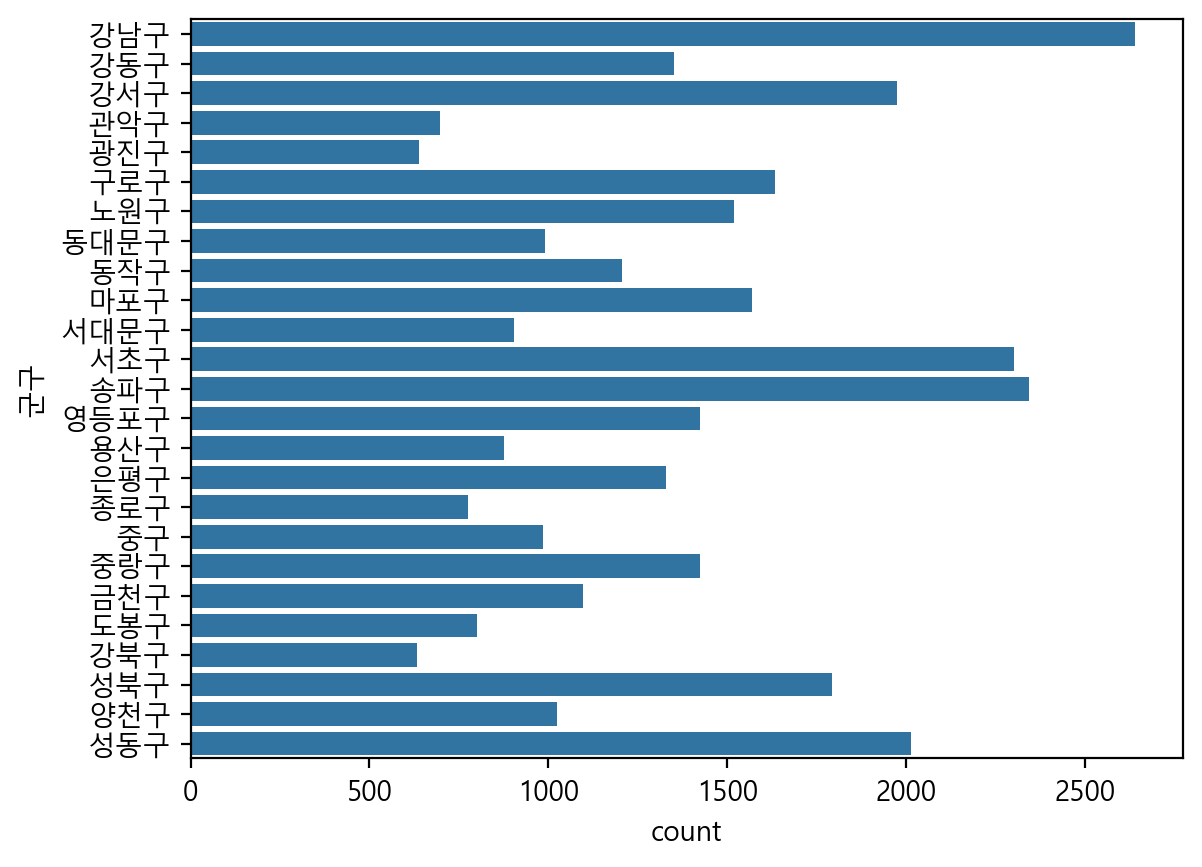

In [14]:
#plt.title("서울 전기차 충전소 분포")
#plt.bar(seoul_char_data['군구'].value_counts().index, seoul_char_data['군구'].value_counts().values)

sns.countplot(data = seoul_char_data, y='군구')
plt.show()

Text(0, 0.5, '등록대수')

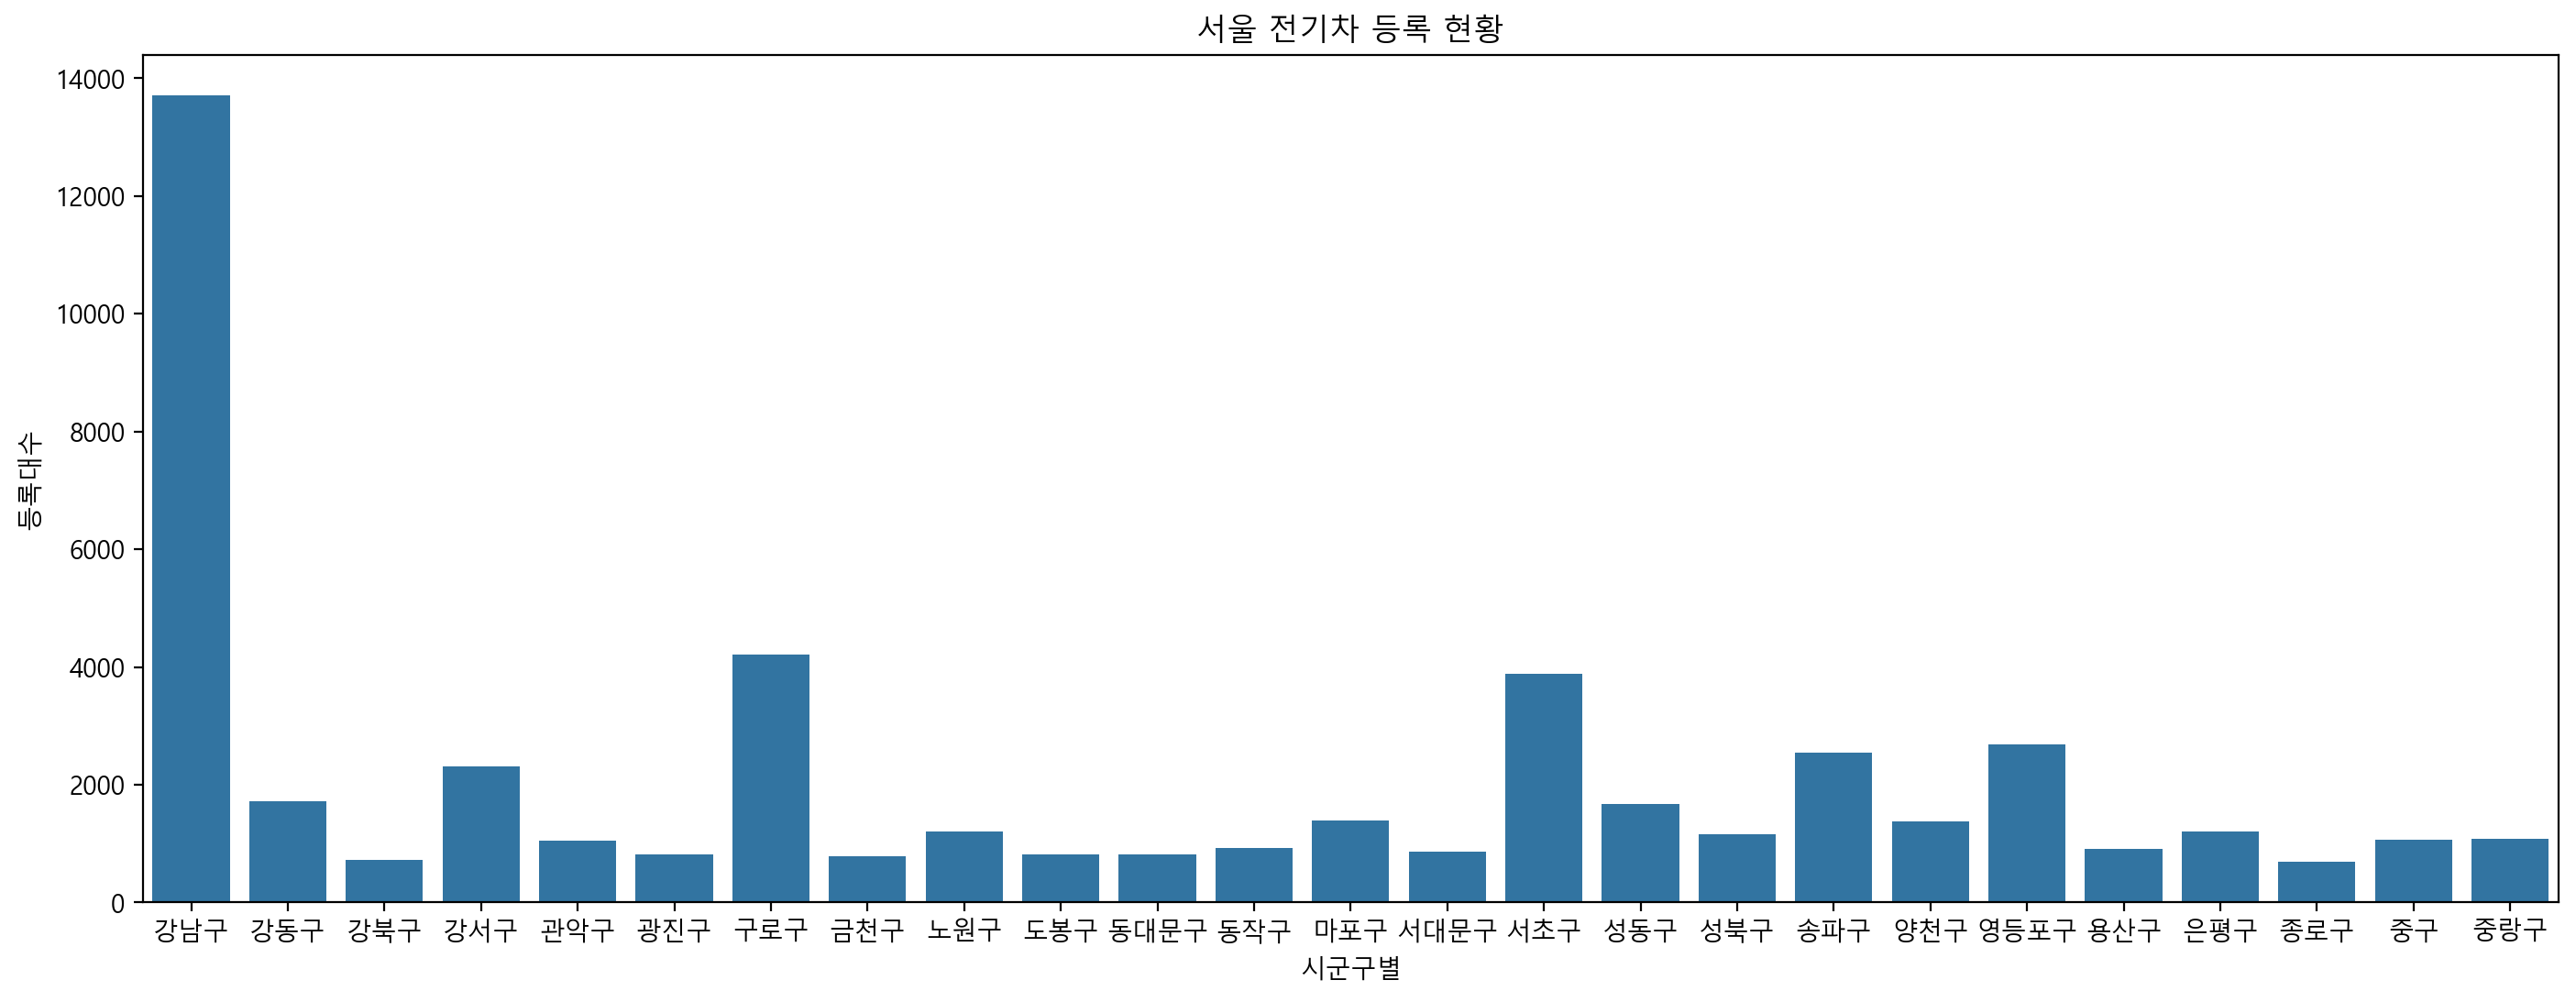

In [15]:
plt.figure(figsize=(17,6))

plt.title("서울 전기차 등록 현황")

sns.barplot(x=seoul_ecar_data_result['시군구별'], y=seoul_ecar_data_result['계'])

plt.ylabel("등록대수")

Text(0, 0.5, '전기충전소')

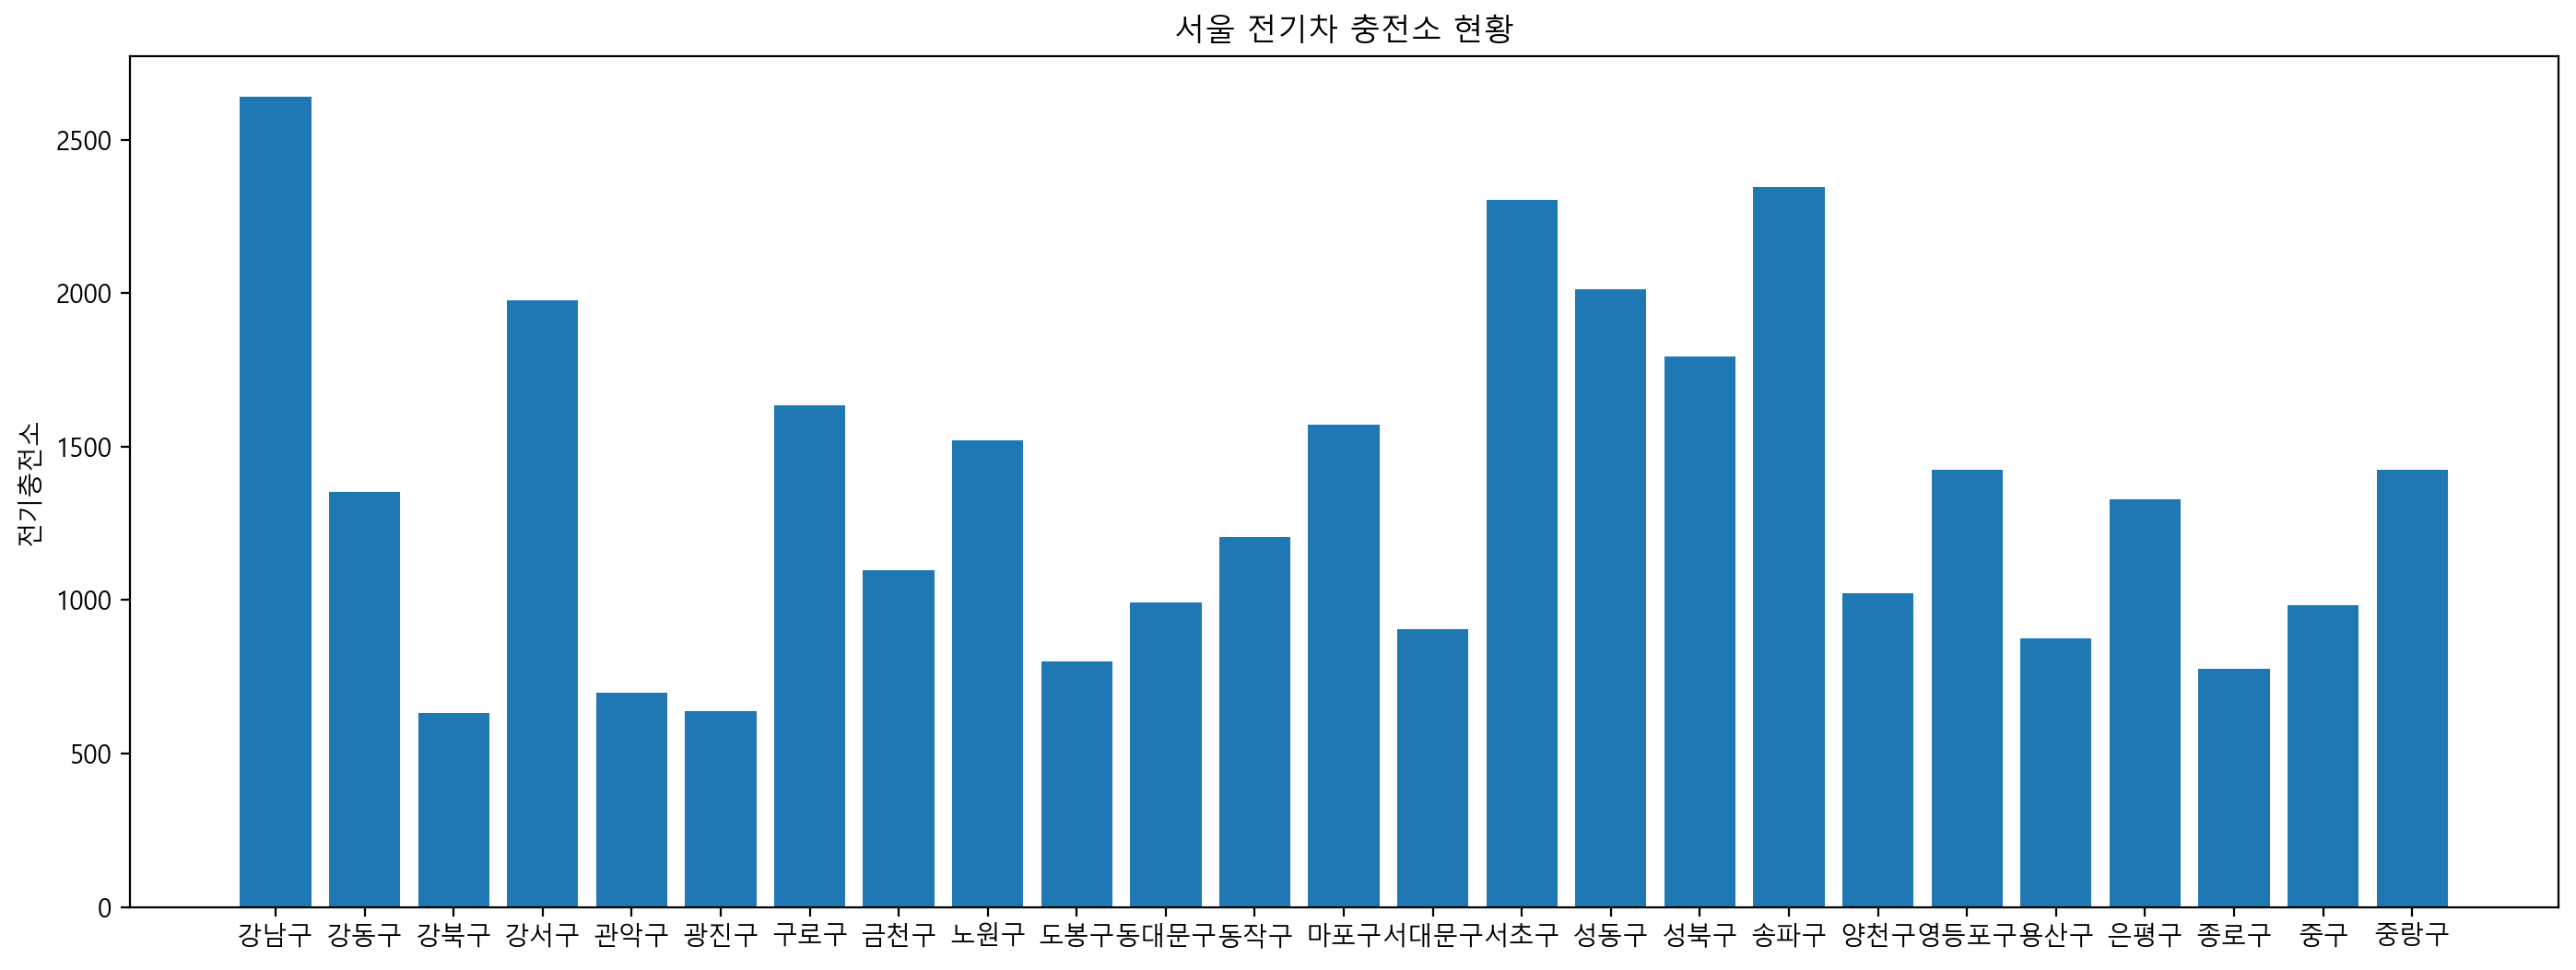

In [16]:
plt.figure(figsize=(17,6))

plt.title("서울 전기차 충전소 현황")
seoul_char_data_sorted = seoul_char_data['군구'].value_counts().sort_index()
plt.bar(seoul_char_data_sorted.index, seoul_char_data_sorted.values)

plt.ylabel("전기충전소")

<Axes: title={'center': '서울 전기차 충전소 현황'}, xlabel='시군구별', ylabel='계'>

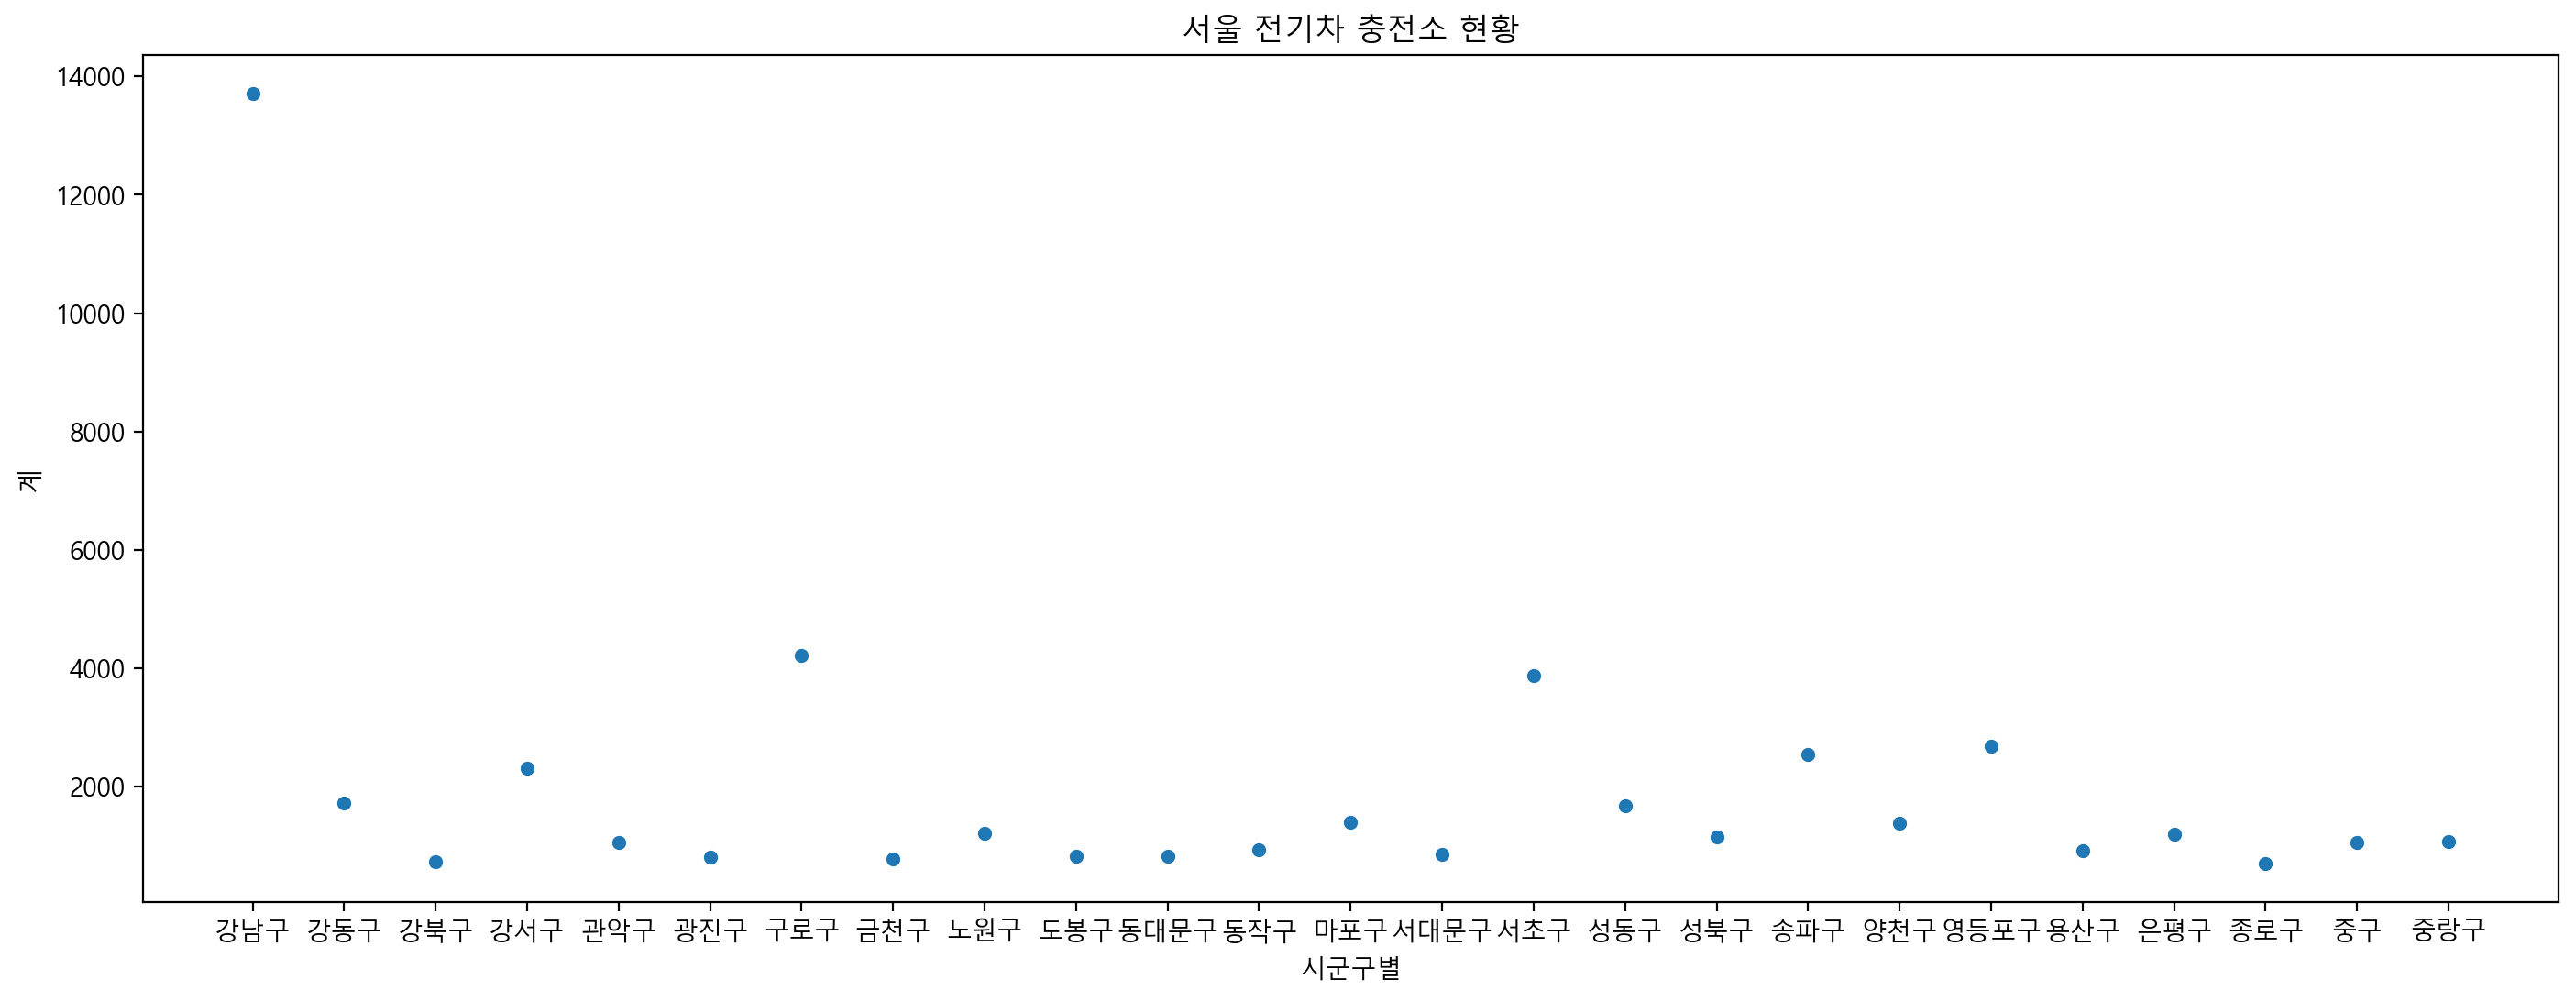

In [17]:
#전기차 등록 대수 그래프

plt.figure(figsize=(17,6))
plt.title("서울 전기차 충전소 현황")
sns.scatterplot(x=seoul_ecar_data_result['시군구별'], y=seoul_ecar_data_result['계'])

Text(0, 0.5, '급속 전기충전소')

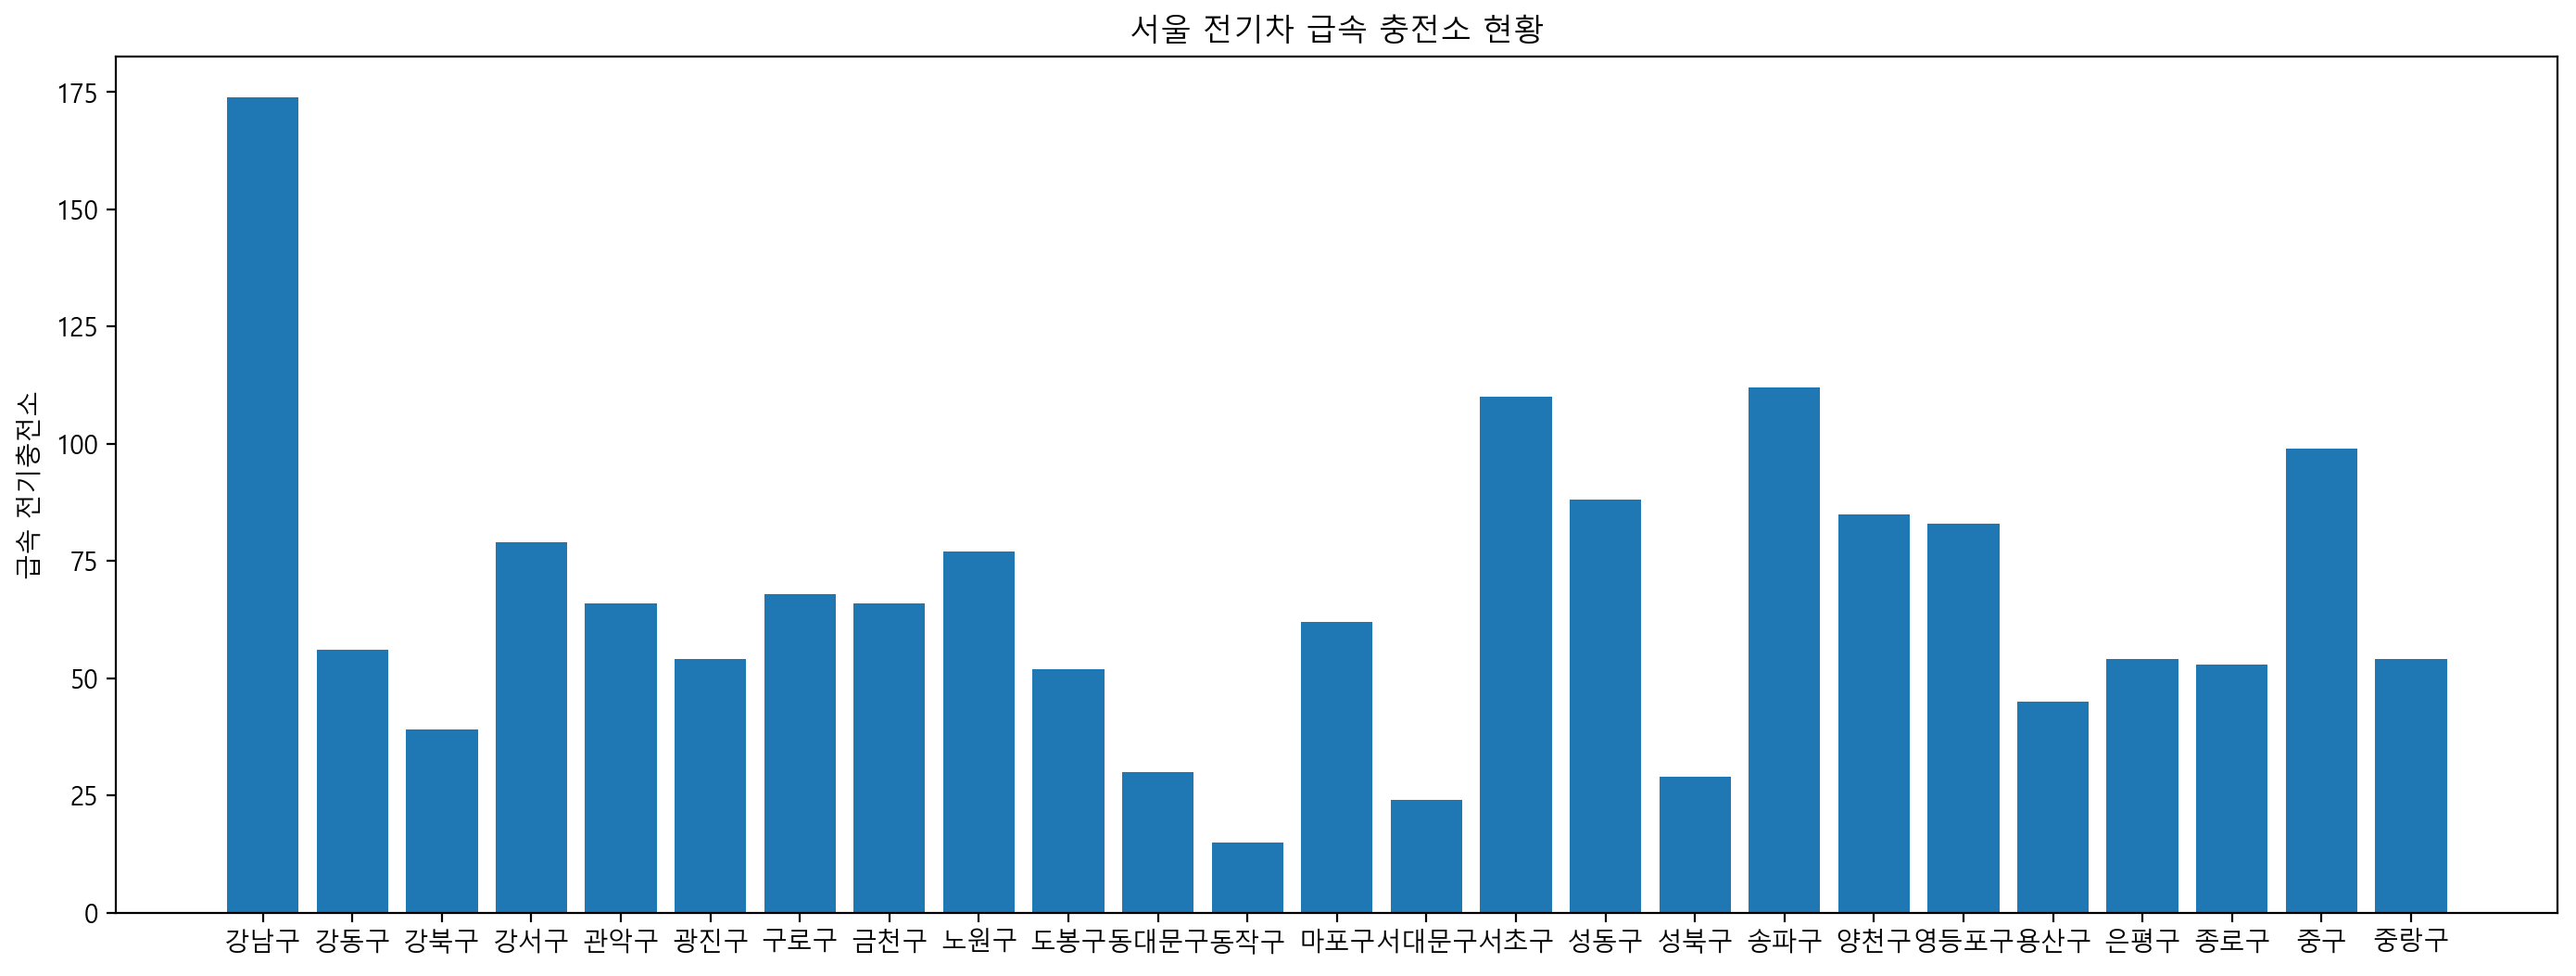

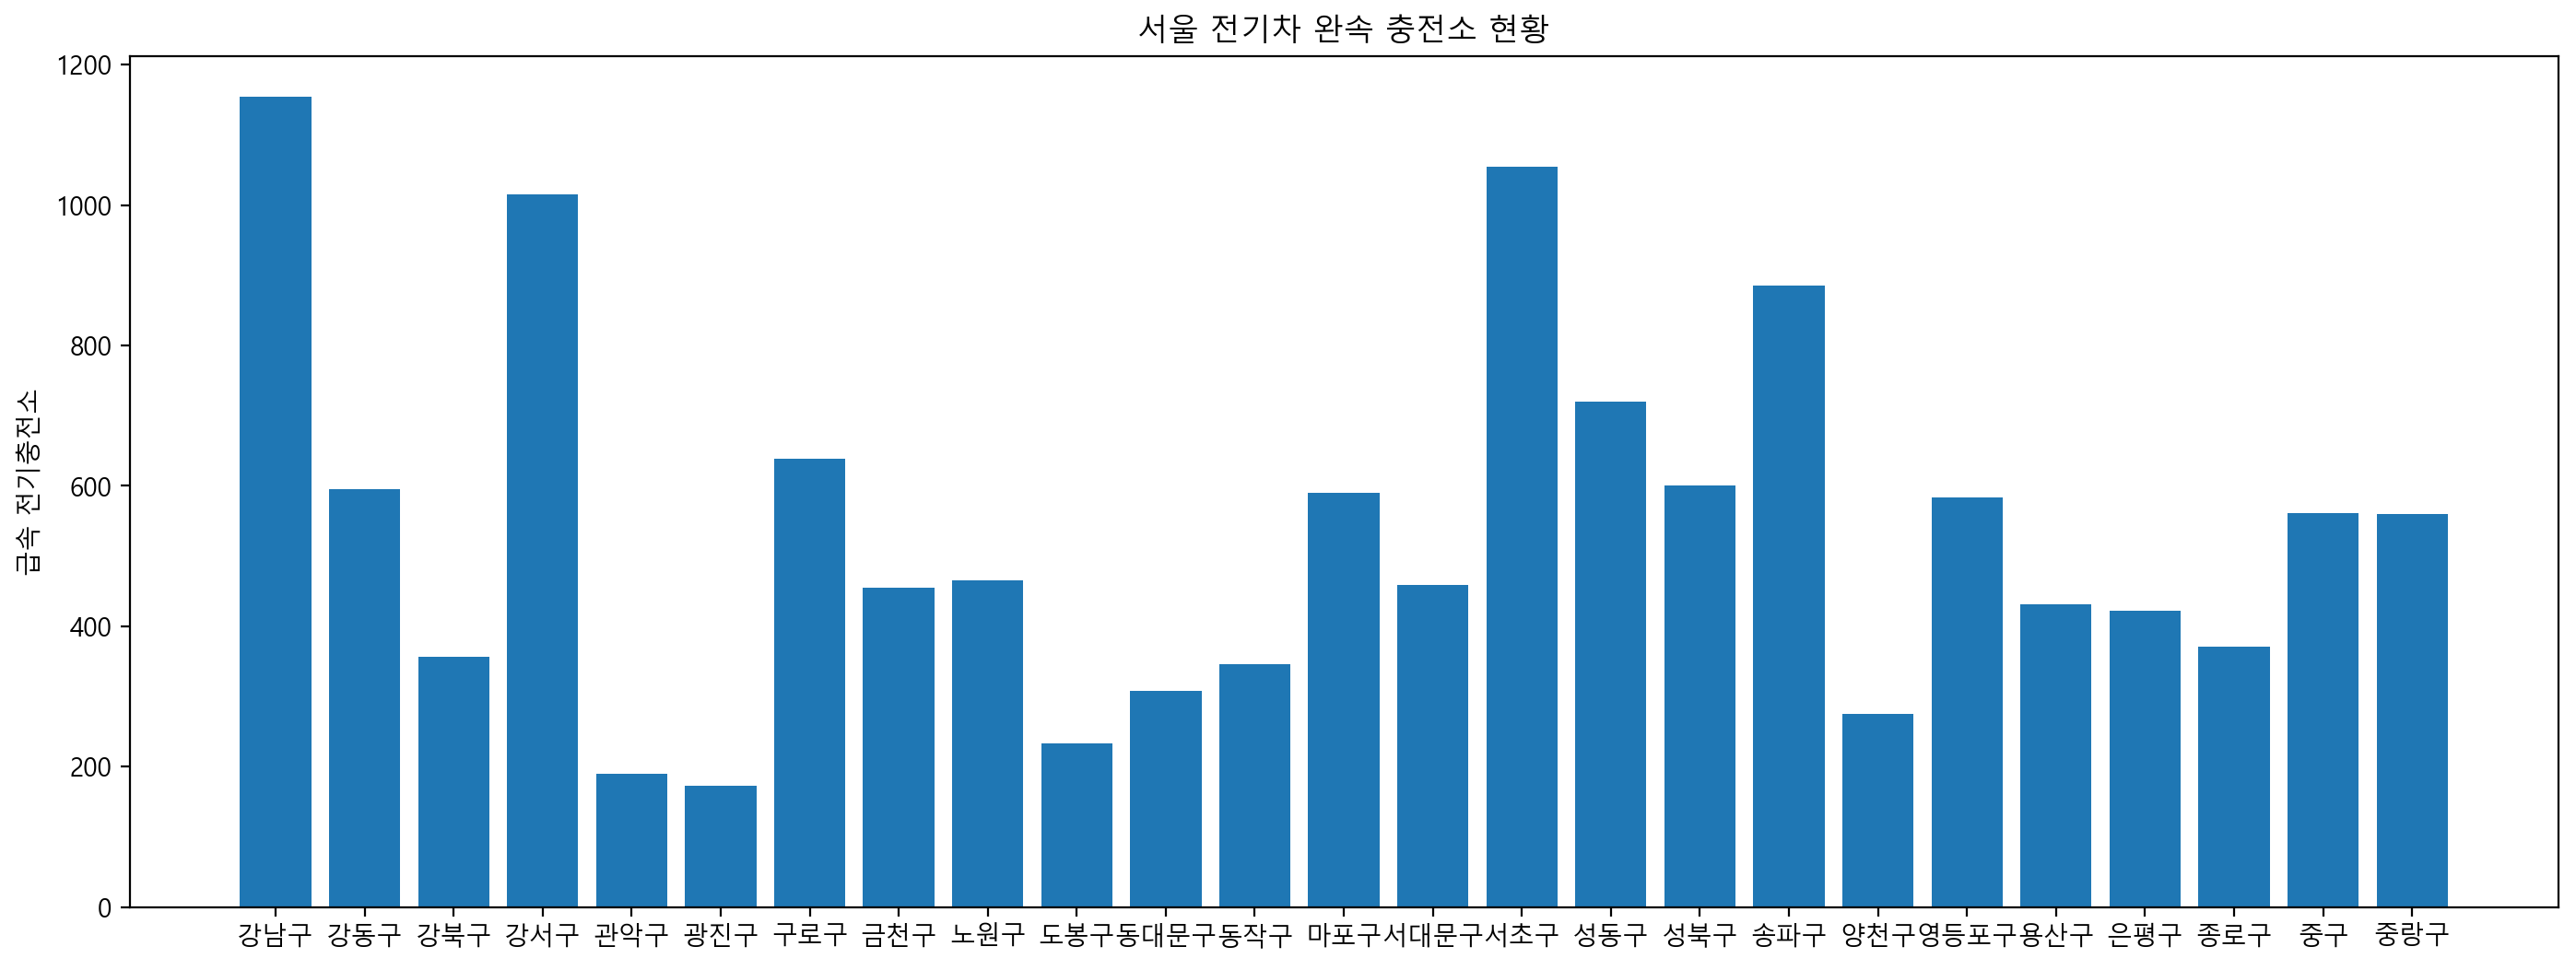

In [18]:
plt.figure(figsize=(17,6))

plt.title("서울 전기차 급속 충전소 현황")
fast_char_data_sorted = fast_char_data['군구'].value_counts().sort_index()
plt.bar(fast_char_data_sorted.index, fast_char_data_sorted.values)

plt.ylabel("급속 전기충전소")

plt.figure(figsize=(17,6))

plt.title("서울 전기차 완속 충전소 현황")
slow_char_data_sorted = slow_char_data['군구'].value_counts().sort_index()
plt.bar(slow_char_data_sorted.index, slow_char_data_sorted.values)

plt.ylabel("급속 전기충전소")

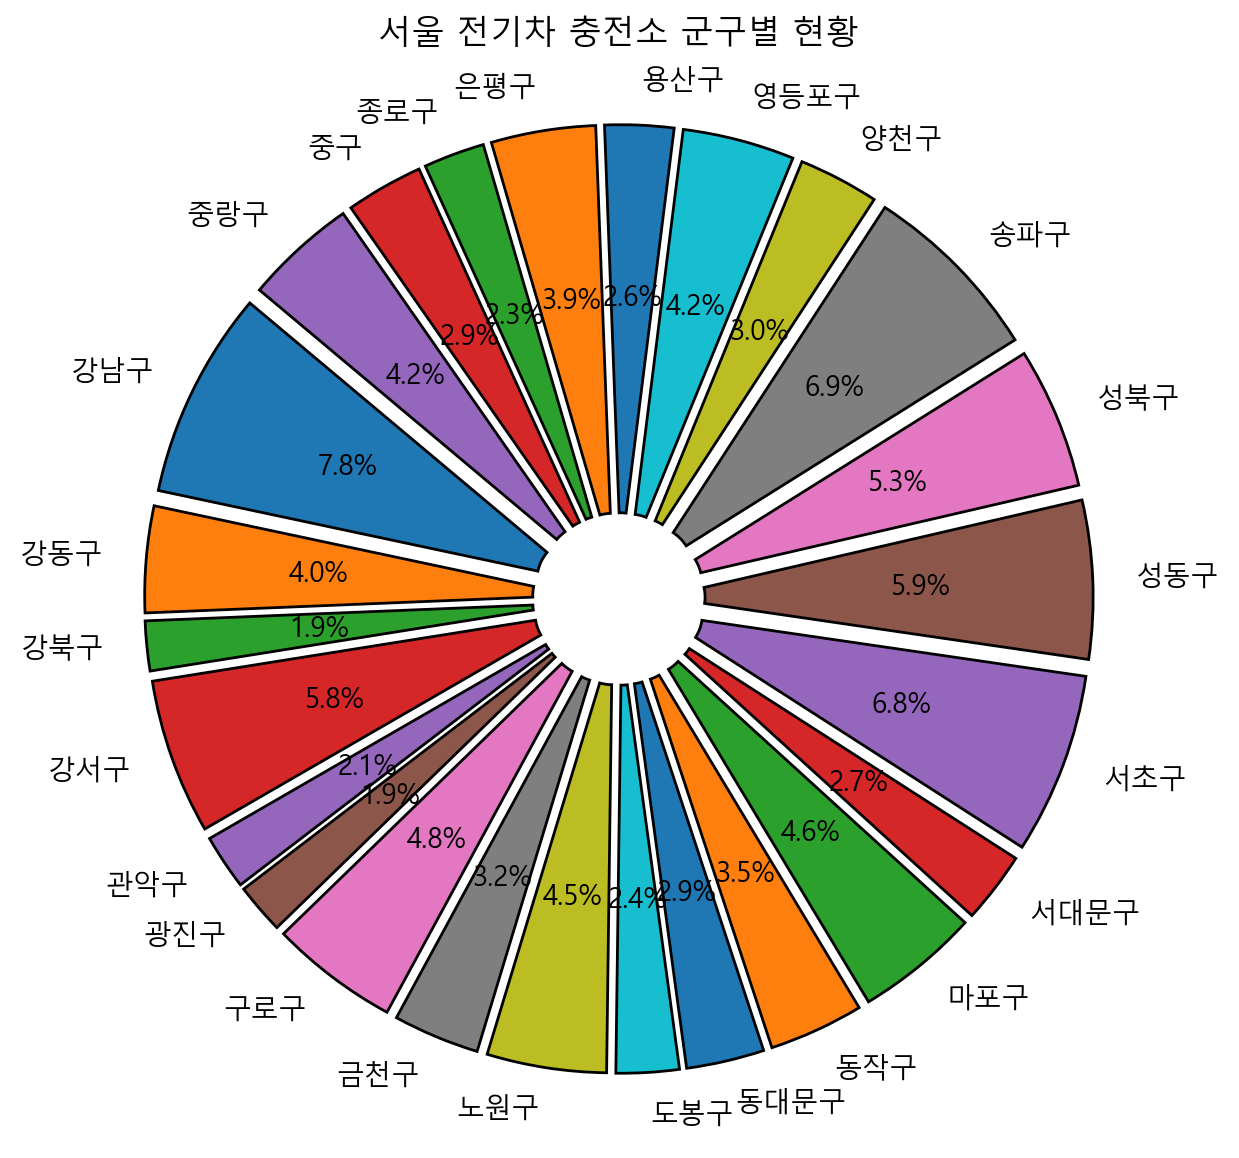

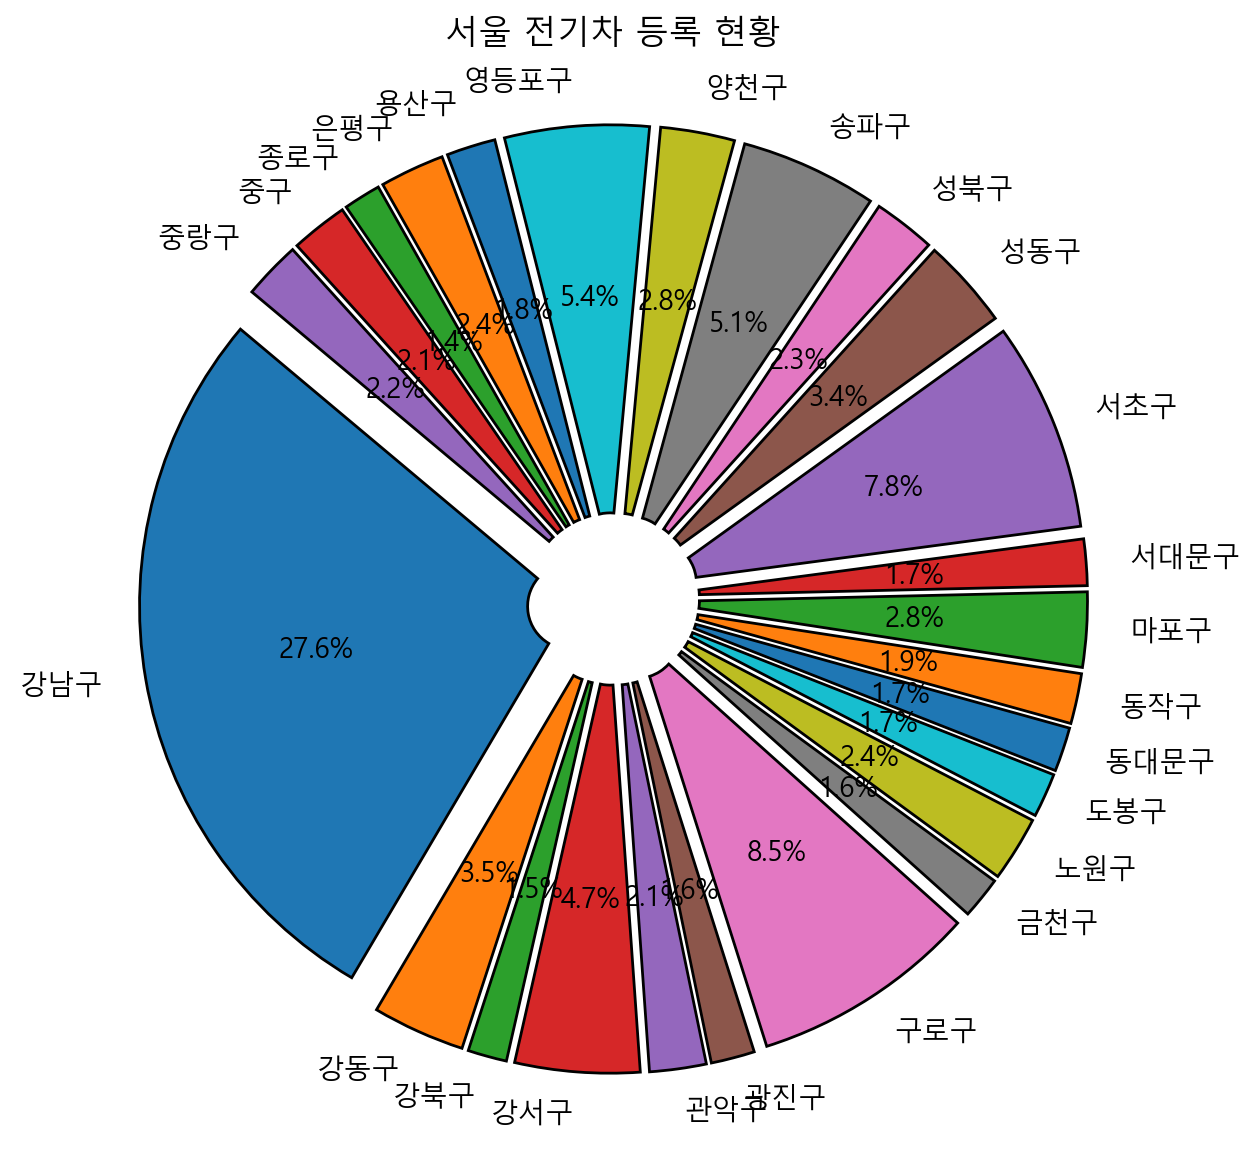

In [24]:
import matplotlib.pyplot as plt

#전기차 충전소 현황 파이그래프
plt.figure(figsize=(7, 7))

labels = seoul_char_data['군구'].value_counts().sort_index().index
sizes = seoul_char_data['군구'].value_counts().sort_index().values
wedgeprops = {'width' : 0.9, 'edgecolor' : 'k', 'linewidth' : 1}
explode = (0.1,) * len(labels)

plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, startangle=140, wedgeprops= wedgeprops)
plt.title('서울 전기차 충전소 군구별 현황')

plt.show()

#전기차 등록대수 현황 파이그래프
plt.figure(figsize=(7, 7))

labels = seoul_ecar_data_result['시군구별']
sizes = seoul_ecar_data_result['계']
wedgeprops = {'width' : 0.9, 'edgecolor' : 'k', 'linewidth' : 1}
explode = (0.1,) * len(labels)  

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode, wedgeprops= wedgeprops)
plt.title('서울 전기차 등록 현황')

plt.show()


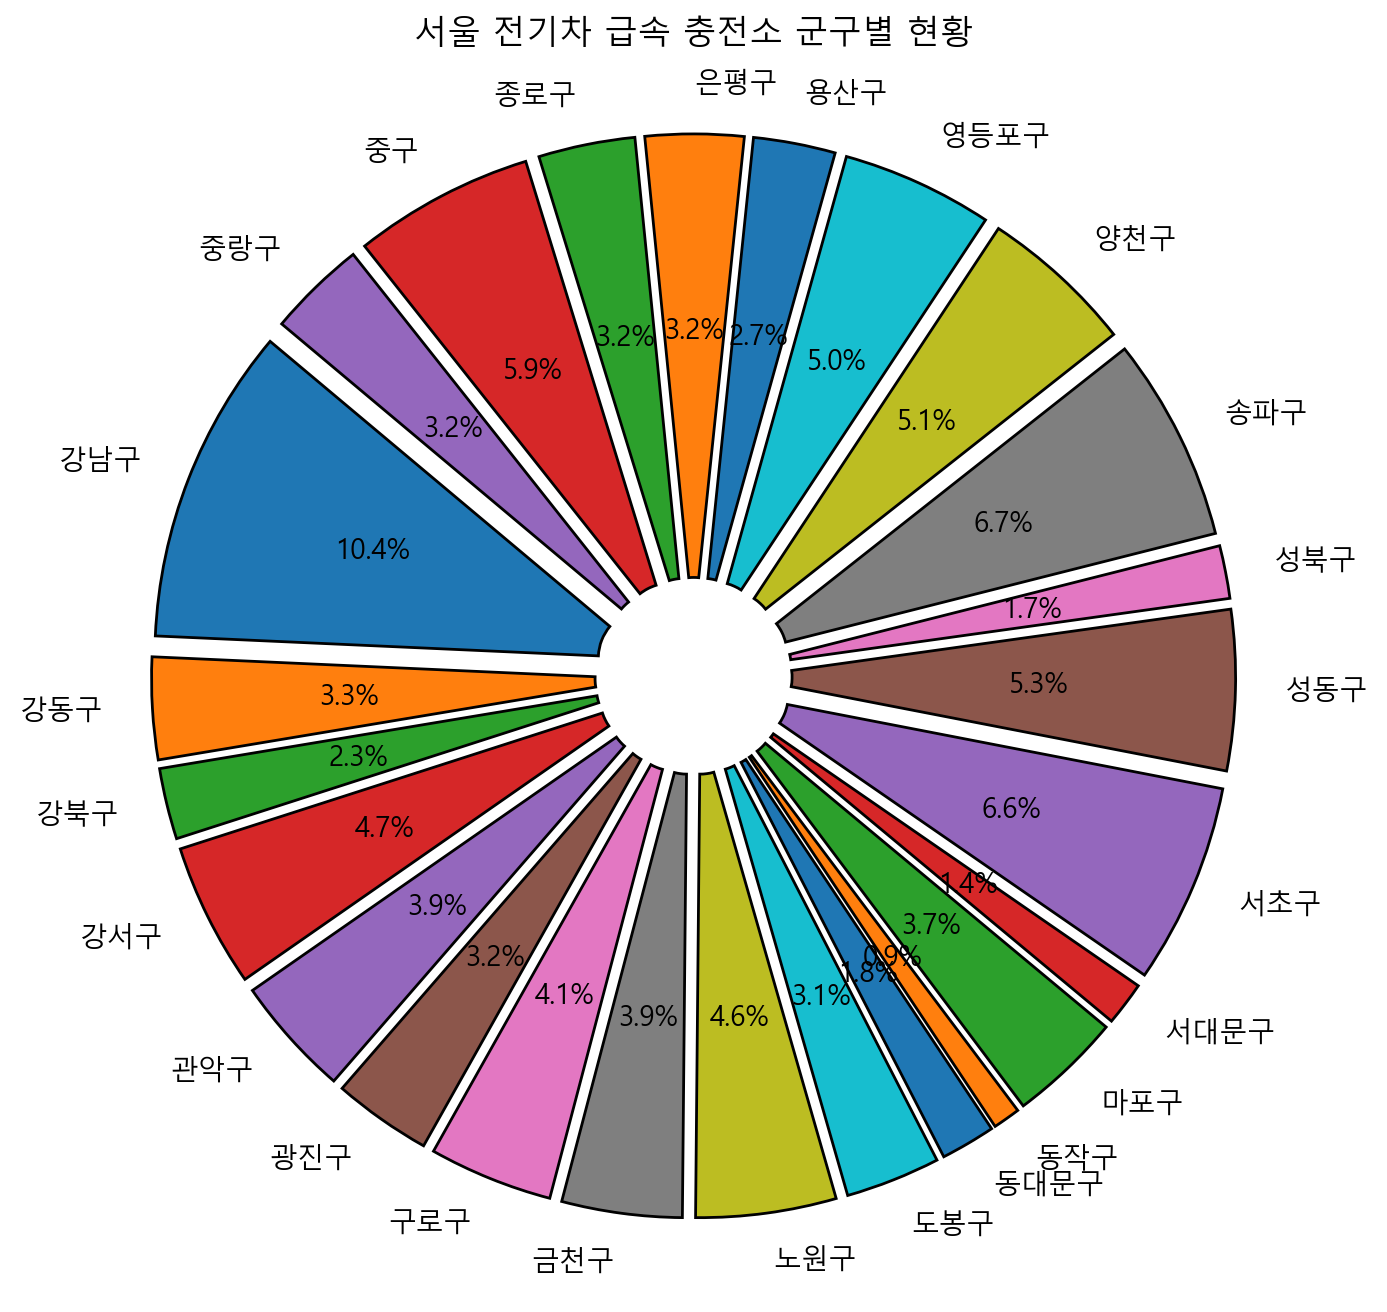

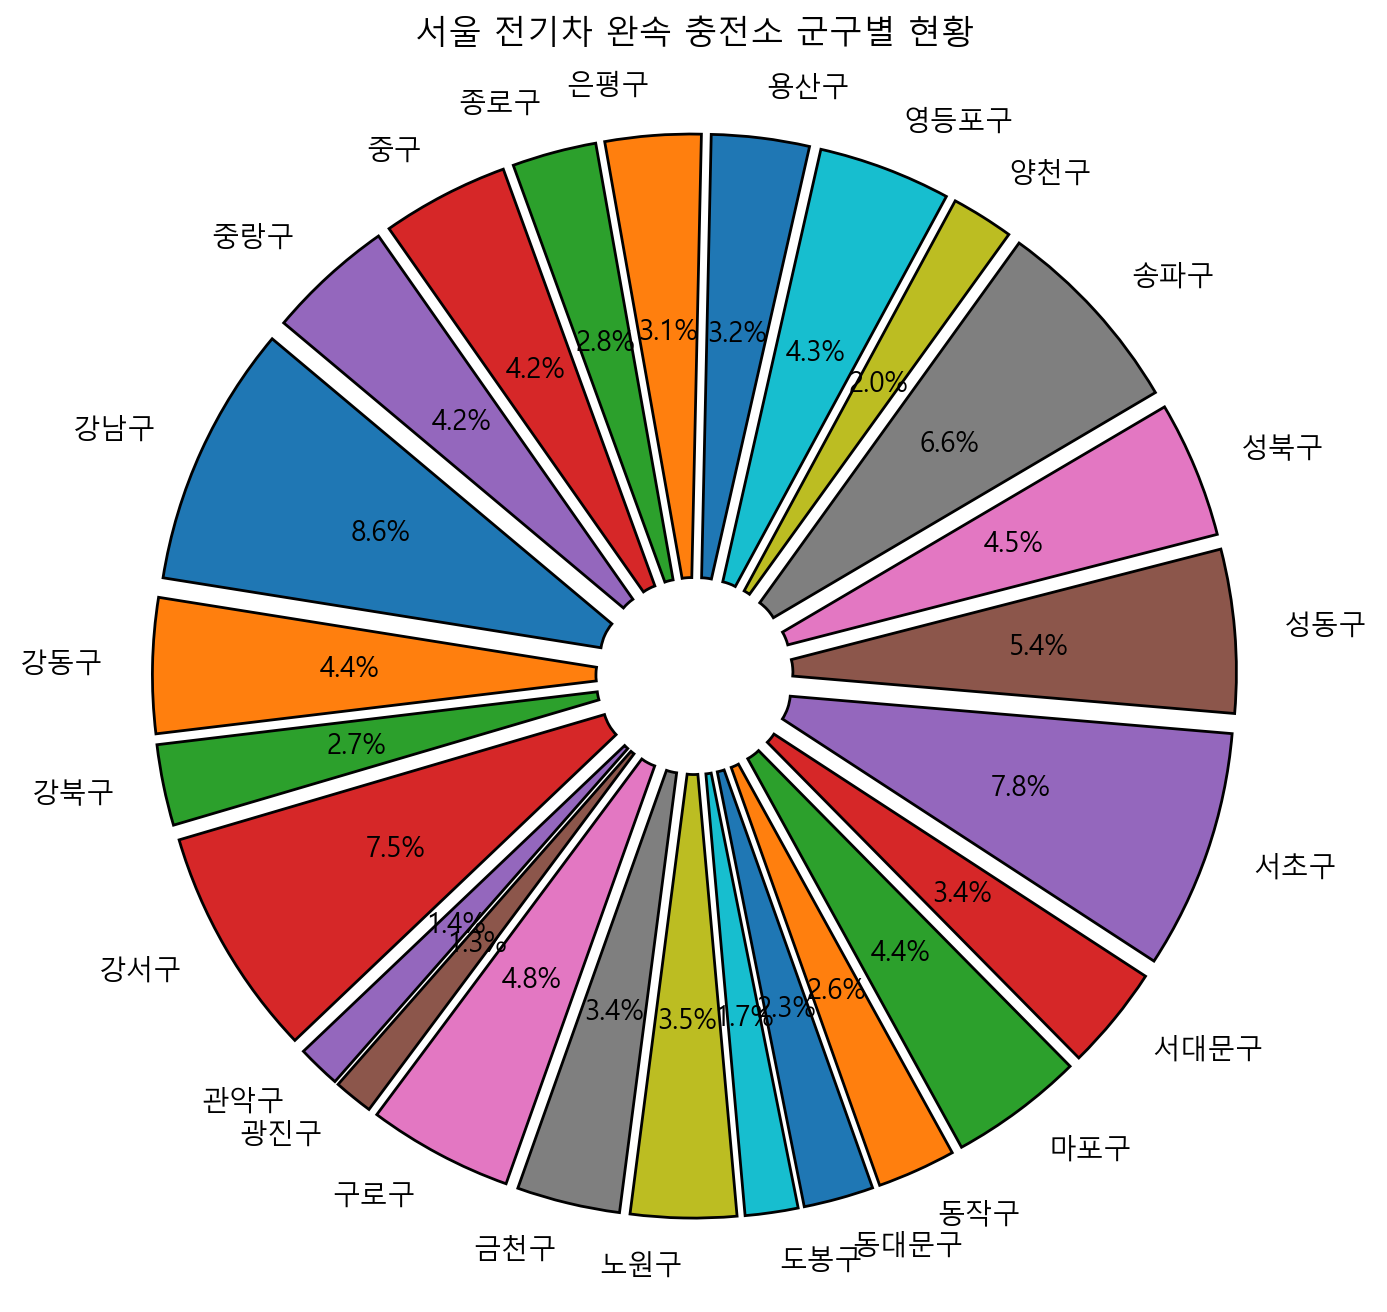

In [20]:
plt.figure(figsize=(8, 8))

labels = fast_char_data['군구'].value_counts().sort_index().index
sizes = fast_char_data['군구'].value_counts().sort_index().values
wedgeprops = {'width' : 0.9, 'edgecolor' : 'k', 'linewidth' : 1}
explode = (0.1,) * len(labels)

plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, startangle=140, wedgeprops= wedgeprops)
plt.title('서울 전기차 급속 충전소 군구별 현황')

plt.show()

plt.figure(figsize=(8, 8))

labels = slow_char_data['군구'].value_counts().sort_index().index
sizes = slow_char_data['군구'].value_counts().sort_index().values
wedgeprops = {'width' : 0.9, 'edgecolor' : 'k', 'linewidth' : 1}
explode = (0.1,) * len(labels)

plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, startangle=140, wedgeprops= wedgeprops)
plt.title('서울 전기차 완속 충전소 군구별 현황')

plt.show()

In [21]:
import folium

seoul_center = [37.5665, 126.9780]

seoul_map = folium.Map(location=seoul_center, zoom_start=11)

choropleth = folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json',
    data=seoul_char_data['군구'].value_counts(),
    columns=['군구', '주소'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    legend_name='충전소 개수'
).add_to(seoul_map)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=False)
)

seoul_map


In [22]:

seoul_center = [37.5665, 126.9780]

seoul_map = folium.Map(location=seoul_center, zoom_start=11)

choropleth = folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json',
    data=seoul_ecar_data_result,
    columns=['시군구별', '계'], 
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    legend_name='전기차 대수'
).add_to(seoul_map)

choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=False)
)

html_file_path = "seoul_choropleth_map.html"
seoul_map.save(html_file_path)

HTML(filename=html_file_path)

seoul_map